# Mini Project - IronKaggle

## Imports

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline


## Explore dataset

In [7]:
# load dataset
sales = pd.read_csv('sales.csv')
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB
None


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [8]:
# Let's drop the unnamed column and the store id
sales.drop(columns=['Unnamed: 0', 'store_ID'], inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   day_of_week          640840 non-null  int64 
 1   date                 640840 non-null  object
 2   nb_customers_on_day  640840 non-null  int64 
 3   open                 640840 non-null  int64 
 4   promotion            640840 non-null  int64 
 5   state_holiday        640840 non-null  object
 6   school_holiday       640840 non-null  int64 
 7   sales                640840 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 39.1+ MB


In [10]:
# check for missing value
sales.isna().sum()

day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [11]:
# We have two categorical data: date and state_holiday
print(sales.state_holiday.unique())

# let's convert state holiday to integer values
sales['state_holiday'] = sales['state_holiday'].map({'0': 0, 'a': 1, 'b': 2, 'c': 3})
sales['state_holiday'] = pd.to_numeric(sales['state_holiday'], errors='coerce')
print(sales.state_holiday.unique())
print(sales.info())

['0' 'a' 'c' 'b']
[0 1 3 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   day_of_week          640840 non-null  int64 
 1   date                 640840 non-null  object
 2   nb_customers_on_day  640840 non-null  int64 
 3   open                 640840 non-null  int64 
 4   promotion            640840 non-null  int64 
 5   state_holiday        640840 non-null  int64 
 6   school_holiday       640840 non-null  int64 
 7   sales                640840 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 39.1+ MB
None


In [13]:
# One hot encoding the day of the week so models can handle categorical features well when represented as binary (one-hot encoded) variables
sales = pd.get_dummies(sales, columns=['day_of_week'], drop_first=False)


In [14]:
print(sales.info())
sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date                 640840 non-null  object
 1   nb_customers_on_day  640840 non-null  int64 
 2   open                 640840 non-null  int64 
 3   promotion            640840 non-null  int64 
 4   state_holiday        640840 non-null  int64 
 5   school_holiday       640840 non-null  int64 
 6   sales                640840 non-null  int64 
 7   day_of_week_1        640840 non-null  bool  
 8   day_of_week_2        640840 non-null  bool  
 9   day_of_week_3        640840 non-null  bool  
 10  day_of_week_4        640840 non-null  bool  
 11  day_of_week_5        640840 non-null  bool  
 12  day_of_week_6        640840 non-null  bool  
 13  day_of_week_7        640840 non-null  bool  
dtypes: bool(7), int64(6), object(1)
memory usage: 38.5+ MB
None


,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7
0,2013-04-18,517,1,0,0,0,4422,False,False,False,True,False,False,False
1,2015-04-11,694,1,0,0,0,8297,False,False,False,False,False,True,False
2,2013-08-29,970,1,1,0,0,9729,False,False,False,True,False,False,False
3,2013-05-28,473,1,1,0,0,6513,False,True,False,False,False,False,False
4,2013-10-10,1068,1,1,0,0,10882,False,False,False,True,False,False,False


In [15]:
# Now lets split dates into three columns
sales['date'] = pd.to_datetime(sales['date'], errors='coerce')
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day
sales.drop('date', axis=1, inplace=True)  # drop date column
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   nb_customers_on_day  640840 non-null  int64
 1   open                 640840 non-null  int64
 2   promotion            640840 non-null  int64
 3   state_holiday        640840 non-null  int64
 4   school_holiday       640840 non-null  int64
 5   sales                640840 non-null  int64
 6   day_of_week_1        640840 non-null  bool 
 7   day_of_week_2        640840 non-null  bool 
 8   day_of_week_3        640840 non-null  bool 
 9   day_of_week_4        640840 non-null  bool 
 10  day_of_week_5        640840 non-null  bool 
 11  day_of_week_6        640840 non-null  bool 
 12  day_of_week_7        640840 non-null  bool 
 13  year                 640840 non-null  int32
 14  month                640840 non-null  int32
 15  day                  640840 non-null  int32
dtypes:

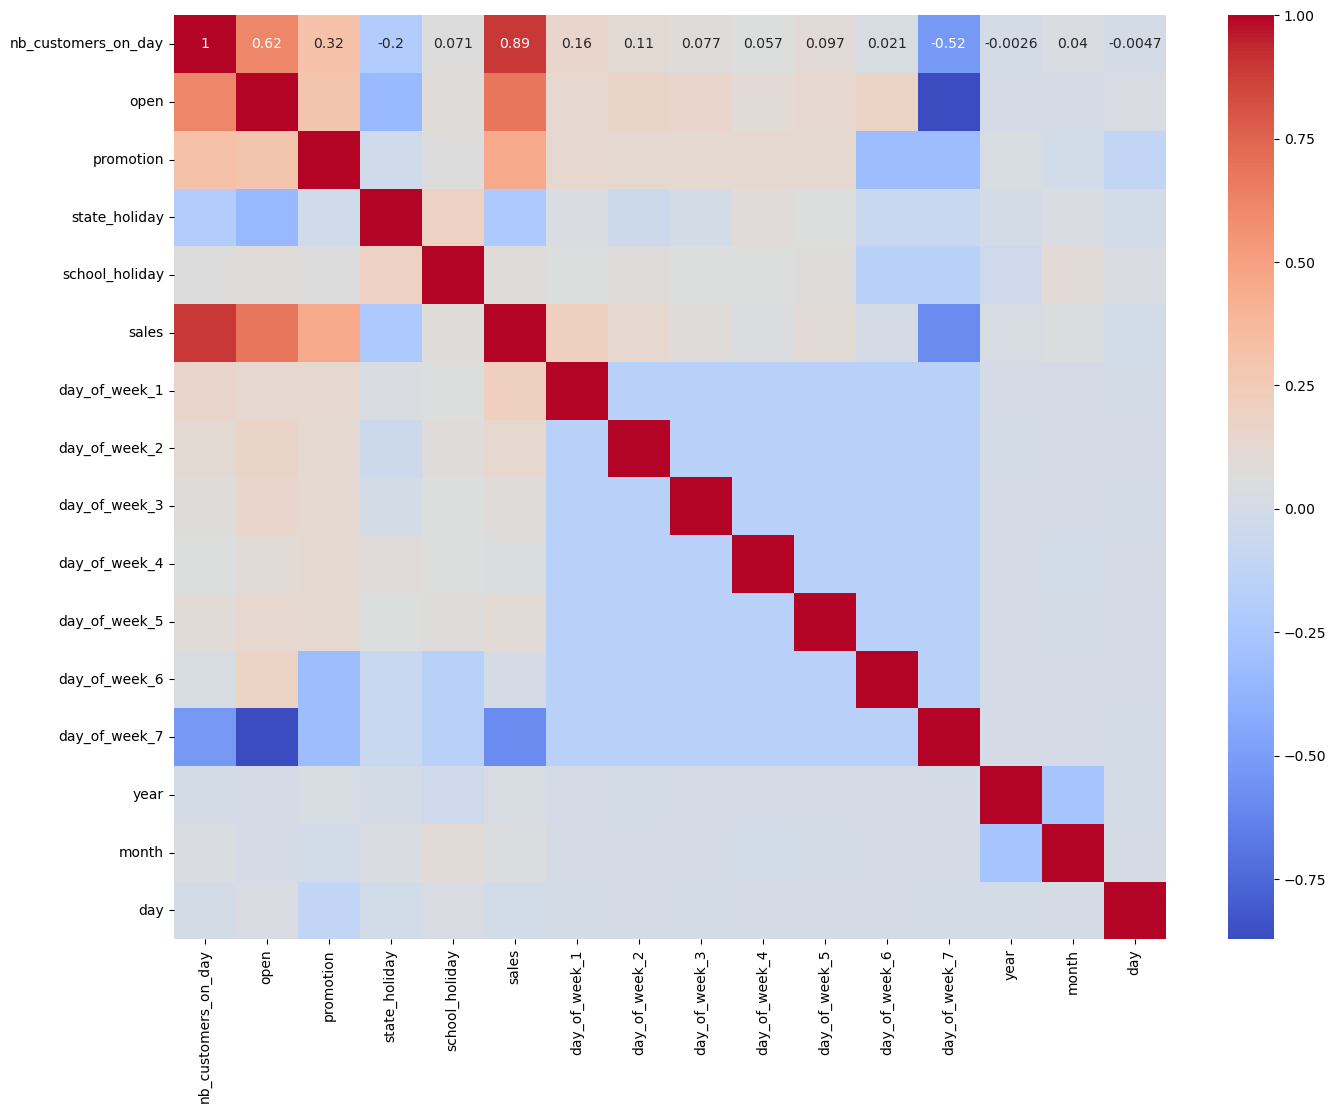

In [16]:
# Let's check the collinearity
def plot_correlation_matrix(data):
    corr_matrix = data.corr()

    plt.figure(figsize=(16, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

plot_correlation_matrix(sales)

In [17]:
# Lets save our target sales column and remove it from input features
y = sales['sales']
X = sales.drop('sales', axis=1)

print(X.info())
print()
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   nb_customers_on_day  640840 non-null  int64
 1   open                 640840 non-null  int64
 2   promotion            640840 non-null  int64
 3   state_holiday        640840 non-null  int64
 4   school_holiday       640840 non-null  int64
 5   day_of_week_1        640840 non-null  bool 
 6   day_of_week_2        640840 non-null  bool 
 7   day_of_week_3        640840 non-null  bool 
 8   day_of_week_4        640840 non-null  bool 
 9   day_of_week_5        640840 non-null  bool 
 10  day_of_week_6        640840 non-null  bool 
 11  day_of_week_7        640840 non-null  bool 
 12  year                 640840 non-null  int32
 13  month                640840 non-null  int32
 14  day                  640840 non-null  int32
dtypes: bool(7), int32(3), int64(5)
memory usage: 36.1 M

In [18]:
# Let's standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def apply_standard_scaler(df):
    
    numeric_columns = ['nb_customers_on_day', 'promotion', 'year', 'month', 'day']
    df_stand = df.copy()
    df_stand[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df_stand

X_stand = apply_standard_scaler(X)
X_stand.describe()


,nb_customers_on_day,open,promotion,state_holiday,school_holiday,year,month,day
count,6.408400e+05,640840.000000,6.408400e+05,640840.000000,640840.000000,6.408400e+05,6.408400e+05,6.408400e+05
mean,1.242929e-17,0.830185,-5.328738e-17,0.045475,0.178472,-2.691539e-14,2.529099e-17,3.543622e-17
std,1.000001e+00,0.375470,1.000001e+00,0.284826,0.382910,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.364806e+00,0.000000,-7.857380e-01,0.000000,0.000000,-1.070777e+00,-1.457085e+00,-1.673461e+00
25%,-4.921386e-01,1.000000,-7.857380e-01,0.000000,0.000000,-1.070777e+00,-8.557980e-01,-8.772080e-01
50%,-5.257248e-02,1.000000,-7.857380e-01,0.000000,0.000000,2.156714e-01,4.613238e-02,3.279546e-02
75%,4.408620e-01,1.000000,1.272689e+00,0.000000,0.000000,2.156714e-01,6.474193e-01,8.290485e-01
max,1.039574e+01,1.000000,1.272689e+00,3.000000,1.000000,1.502119e+00,1.849993e+00,1.739052e+00


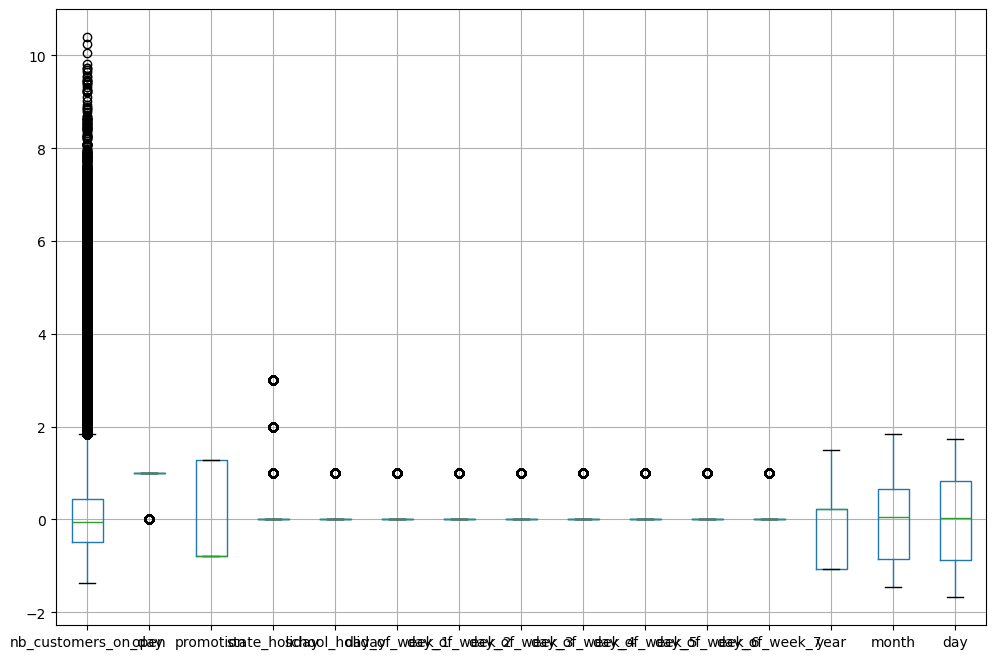

In [19]:
def plot_boxplot(data):
    data.boxplot(figsize=(12, 8))
    plt.show()

plot_boxplot(X_stand)


## Split Dataset

In [20]:
# lets split the dataset and create our sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(512672, 15) (128168, 15)
(512672,) (128168,)


## Model 1: Linear Regression

In [21]:
# Initisalise and train linear regression model
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [22]:
# Check metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_reg.predict(X_test)
linear_reg_r2 = r2_score(y_test, y_pred)
linear_reg_mse = mean_squared_error(y_test, y_pred)

print(f'Model1 r2_score: {linear_reg_r2}')
print(f'Model1 mse: {linear_reg_mse}')


Model1 r2_score: 0.8553805187466126
Model1 mse: 2137716.19296338


## Model 2: Random Forrest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

In [292]:
y_pred = random_forest.predict(X_test)
random_forest_r2 = r2_score(y_test, y_pred)
random_forest_mse = mean_squared_error(y_test, y_pred)

print(f'Model2 r2_score: {random_forest_r2}')
print(f'Model2 mse: {random_forest_mse}')

Model2 r2_score: 0.86
Model2 mse: 2109035.69


## Model 3: XBoost Regressor

XGBoost r2 Score: 0.528610594702625
XGBoost mse: 6967918.541555224


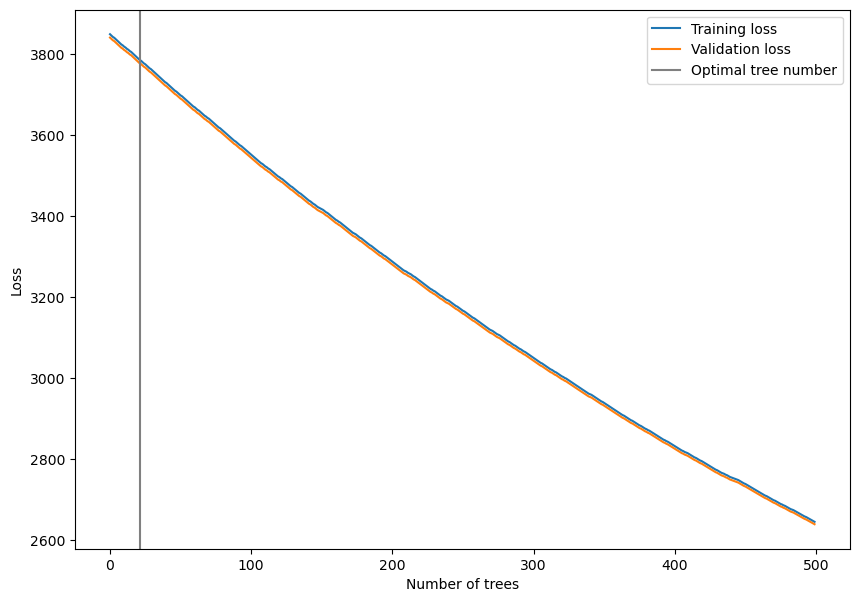

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


xgboost = XGBRegressor(
    objective='reg:squarederror',  # Define the objective function for regression
    n_estimators=1000,              # Number of trees
    learning_rate=0.01,            # Step size shrinkage
    max_depth=6,                   # Maximum depth of a tree
    subsample=0.8,                 # Subsample ratio of the training instances
    colsample_bytree=0.8,          # Subsample ratio of columns when constructing each tree
    early_stopping_rounds=20
)

xgboost.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_test, y_test)], 
            verbose=False)

# Predict on the test data
y_pred = xgboost.predict(X_test)

# Calculate Mean Squared Error (MSE)
xboost_r2 = r2_score(y_test, y_pred)
xboost_mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost r2 Score: {xboost_r2}")
print(f"XGBoost mse: {xboost_mse}")

results = xgboost.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

